# Project 4 Spam Detection

## 1. Data Importing

In [1]:
import pandas as pd

data = pd.read_csv('spam_dataset.csv')

## 2. Exploratory Data Analysis

In [2]:
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## 3. Data Preprocesssing

In [4]:
spam_messages = data[data['label'] == 'spam']
ham_messages = data[data['label'] == 'ham']

min_count = min(len(spam_messages), len(ham_messages))
spam_trimmed = spam_messages.sample(n=min_count, random_state=42)
ham_trimmed = ham_messages.sample(n=min_count, random_state=42)

balanced_data = pd.concat([spam_trimmed, ham_trimmed]).sample(frac=1, random_state=42)

balanced_data = balanced_data.reset_index(drop=True)
balanced_data

,label,message
0,ham,"Come to mu, we're sorting out our narcotics si..."
1,ham,We can go 4 e normal pilates after our intro...
2,ham,Have you laid your airtel line to rest?
3,ham,Gokila is talking with you aha:)
4,ham,We confirm eating at esplanade?
...,...,...
1489,ham,"I'm in a meeting, call me later at"
1490,ham,S da..al r above &lt;#&gt;
1491,ham,"Love isn't a decision, it's a feeling. If we c..."
1492,ham,Wat makes some people dearer is not just de ha...


In [5]:
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

X = data['message']
y = data['label_num']

y.value_counts()

label_num
0    4825
1     747
Name: count, dtype: int64

## 4. Text Vectorization

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = text.fit_transform(X)

print("Shape",X_vectorized.shape)

Shape (5572, 8404)


## 5. Splitting the data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4457, 8404)
Testing set size: (1115, 8404)


## 6. Training Ml Model

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 7. Model Evaluation

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9775784753363229

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## 8. Visualization

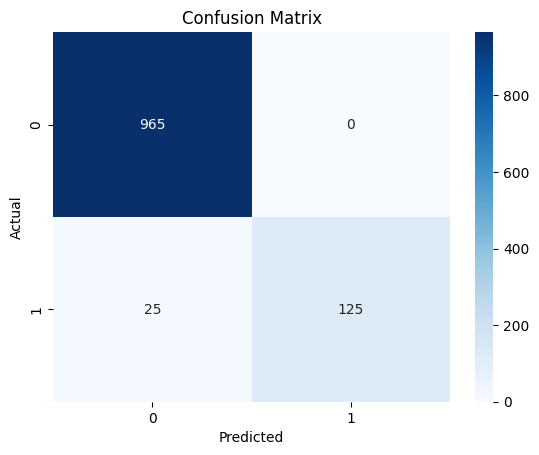

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 9. Predicting the data

In [22]:
def predict_message(msg):
    
    msg_transformed = text.transform([msg])
    result = rf_model.predict(msg_transformed)[0]
    probability = rf_model.predict_proba(msg_transformed)[0][result]
    confidence = round(probability * 100, 2)
    
    return f"{'Spam' if result else 'Not Spam'} (Confidence: {confidence}%)"

In [24]:
print(predict_message("Can you send me the files by 5 PM?"))
print(predict_message("Win ₹1,000 cashback now. Visit www.spamlink.com"))

Not Spam (Confidence: 100.0%)
Spam (Confidence: 66.0%)
